In [316]:
import logging
import os
import sys
import numpy as np
from pathlib import Path
sys.path.append('../src')
import torch
import torch.nn as nn
from clearml import Task
from torch import optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Subset, random_split
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from matplotlib import pyplot as plt
import model
import visualize as viz
from other_models.tiny_unet import UNet
# from utils import get_dev, cfg, get_folder_name, set_cfg
# import utils
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [317]:
from sklearn import decomposition

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
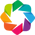

In [318]:
from data_loader import GeoposeDataset
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

## loading images..

100%|██████████| 3111/3111 [06:02<00:00,  8.59img/s]


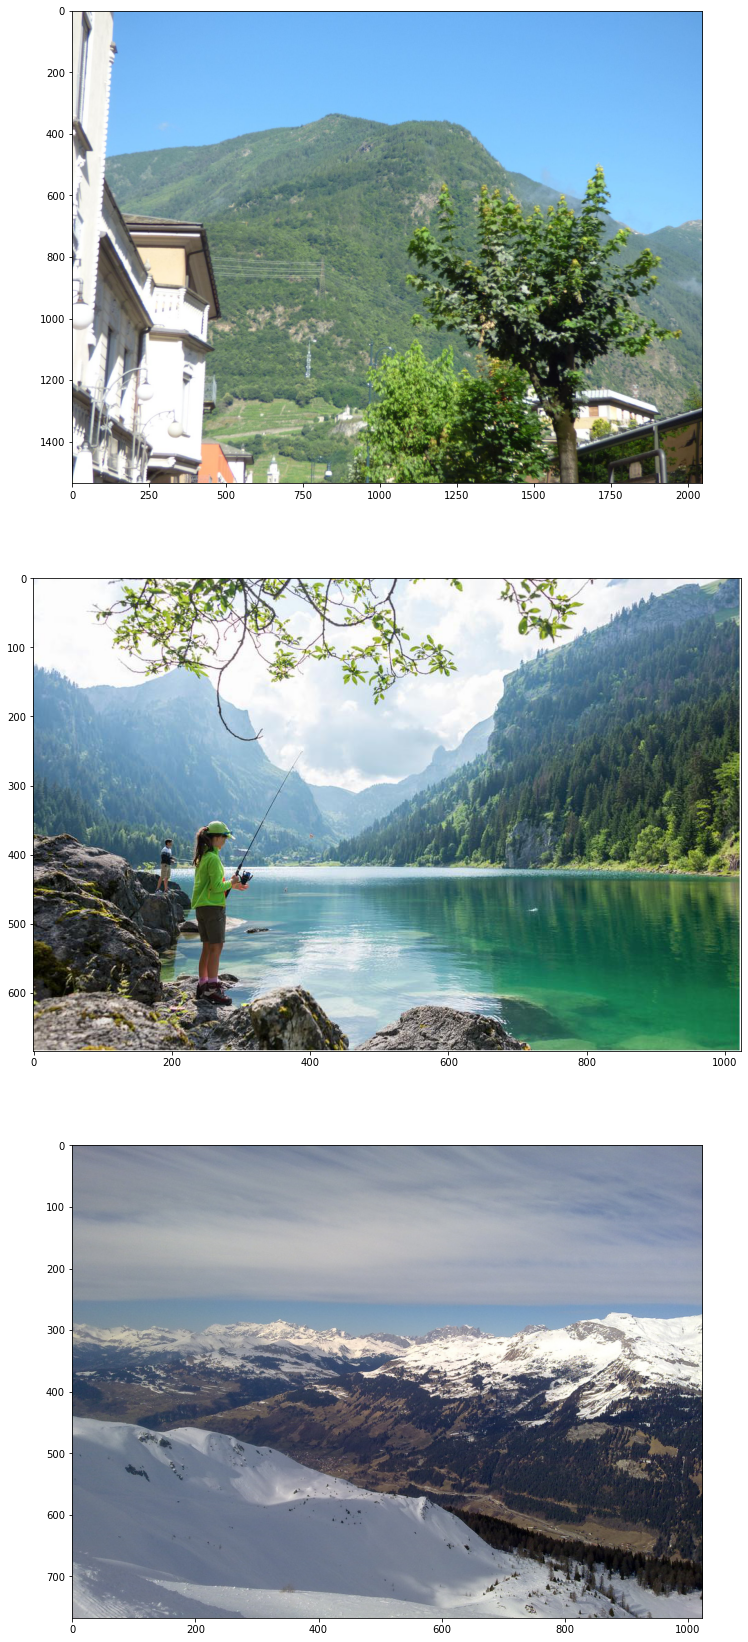

In [3]:
geodat = GeoposeDataset()
plt.figure(figsize=(20,40))
if os.path.exists('geopose_metadata/resolutions.npy'):
    # load resolutions.
    with open('geopose_metadata/resolutions.npy','rb') as f:
        xres = np.load(f)
        yres = np.load(f)
else:
    # extract resolutions and save.
    xres = np.zeros(len(geodat))
    yres = np.zeros(len(geodat))
    # fig, axs = plt.subplots

    with tqdm(total=len(geodat), unit='img') as pbar:
        for i, sample in enumerate(geodat):
            if i<3:
                # show a few images
                plt.subplot(4,1,i+1)
                plt.imshow(sample['image'])
            img_shape = sample['image'].shape
            xres[i] = img_shape[0]
            yres[i] = img_shape[1]
            pbar.update()
    with open('geopose_metadata/resolutions.npy','wb') as f:
        np.save(f,xres)
        np.save(f,yres)
plt.show()

# resolution analysis

In [299]:
# 2dhist
h,xs,ys = np.histogram2d(xres,yres,bins=100)

In [262]:
pca = decomposition.PCA(n_components=2)
tup = np.c_[xres,yres]
pca.fit(tup)
xy = pca.transform(tup)
pc0 = hv.Curve(np.array([pca.mean_ - pca.components_[0]*2000, 
                         pca.mean_, 
                         pca.mean_ + pca.components_[0]*2000]),
              label='principal component').opts(line_color='red')
pc1 = hv.Curve(np.array([pca.mean_, pca.mean_ + pca.components_[1]*1000]))

In [314]:
h, xs, ys = np.histogram2d(xres,yres,bins=6)
biv = hv.Bivariate((xres,yres),kdims=['x-res','y-res']).opts(show_legend=False,
                                                             tools=['hover'],
                                                             width=400, height=400)
scatter = hv.Scatter((xres,yres),kdims='x-res',vdims='y-res').opts(tools=['hover'],width=400, height=400)
dist1d = hv.Distribution(xy,kdims='reduced dim', label='PCA 1D resolutions').opts(tools=['hover'])
hist = hv.QuadMesh((xs,ys,h)).opts(tools=['hover'])
ov = scatter * pc0
biv = biv * pc0
(biv + ov + dist1d).opts(title='Image Resolutions',fontsize={'title': 16})

:Layout
   .Overlay.I                       :Overlay
      .Bivariate.I               :Bivariate   [x-res,y-res]   (Density)
      .Curve.Principal_component :Curve   [x]   (y)
   .Overlay.II                      :Overlay
      .Scatter.I                 :Scatter   [x-res]   (y-res)
      .Curve.Principal_component :Curve   [x]   (y)
   .Distribution.PCA_1D_resolutions :Distribution   [reduced dim]   (Density)

# Aspect Ratios

In [87]:
cmsm = pd.DataFrame(yres/xres,columns=['aspect_ratio']).value_counts().sort_index().cumsum().reset_index(name='cumsum')
cmsm

aspect_ratio  cumsum
0        0.636608       1
1        0.652695       2
2        0.658714       3
3        0.662000       5
4        0.662109      15
..            ...     ...
272      1.599755    3103
273      1.599814    3104
274      1.600000    3109
275      1.600124    3110
276      1.777415    3111

[277 rows x 2 columns]

In [284]:
ar = hv.Distribution(yres/xres, label='Aspect ratios density').opts(tools=['hover'])
cmsm = hv.Curve(cmsm, label='Cumulative aspect ratio').opts(tools=['hover'])
ar + cmsm

:Layout
   .Distribution.Aspect_ratios_density :Distribution   [Value]   (Density)
   .Curve.Cumulative_aspect_ratio      :Curve   [aspect_ratio]   (cumsum)

### looks like most images are 4:3 (1.333) , and many more are 3/2 (1.5).
on the other hand, most images are around 1024x\[680-750\],  
so I'll just go with 1024x680 and crop out top and bottom of images that are 1.333 AR.  
should also throw away ground and sky so good.  
maybe try 1024x750 as well.